# Amazon Product Sales 2023

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_product = pd.read_csv('amazon_products.csv')
df_categories = pd.read_csv('amazon_categories.csv')

In [3]:
df_product.head(1)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.0,104,False,2000


In [4]:
df_categories.head(1)

,id,category_name
0,1,Beading & Jewelry Making


In [5]:
#merging categories from category dataset to product dataset
df = df_product.merge(df_categories, left_on='category_id', right_on='id', how='left')

In [6]:
df.sample(3)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
795141,B0BJV3HRHM,"Light Bar Mounting Brackets, CAMIY 2Pcs Univer...",https://m.media-amazon.com/images/I/71L0PuKqOM...,https://www.amazon.com/dp/B0BJV3HRHM,4.4,0,11.75,0.0,22,False,0,22,"Lights, Bulbs & Indicators"
1144633,B000PANBCO,4-Port USB KVMPâ”˜ Switch,https://m.media-amazon.com/images/I/715WxhGGbu...,https://www.amazon.com/dp/B000PANBCO,3.8,0,175.39,0.0,66,False,0,66,Computer External Components
583192,B082V85468,"Camera Wrist Strap, Soft Hand Strap Compatible...",https://m.media-amazon.com/images/I/51E6kdZK8U...,https://www.amazon.com/dp/B082V85468,4.7,0,9.99,0.0,79,False,0,79,Camera & Photo


In [7]:
df.size

18542381

In [8]:
df.shape

(1426337, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
 11  id                 1426337 non-null  int64  
 12  category_name      1426337 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 131.9+ MB


In [10]:
#dropping irrelevant columns
df = df.drop(['asin', 'reviews','id','category_id'], axis=1)

In [11]:
#renaming the column name's
df = df.rename(columns={'stars': 'rating'})
df = df.rename(columns={'isBestSeller': 'BestSeller'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   title              1426336 non-null  object 
 1   imgUrl             1426337 non-null  object 
 2   productURL         1426337 non-null  object 
 3   rating             1426337 non-null  float64
 4   price              1426337 non-null  float64
 5   listPrice          1426337 non-null  float64
 6   BestSeller         1426337 non-null  bool   
 7   boughtInLastMonth  1426337 non-null  int64  
 8   category_name      1426337 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 88.4+ MB


In [13]:
df.sample(3)

,title,imgUrl,productURL,rating,price,listPrice,BestSeller,boughtInLastMonth,category_name
2913,Long Sleeve Polo Shirts for Men Moisture Wicki...,https://m.media-amazon.com/images/I/81a82gEaN6...,https://www.amazon.com/dp/B0BLSKWDN1,4.5,46.99,0.00,False,100,Men's Clothing
1009955,BioSteel Stackables Creatine Monohydrate Powde...,https://m.media-amazon.com/images/I/71ISGcHRZ-...,https://www.amazon.com/dp/B07FFFDQ3C,4.5,19.95,0.00,False,700,Sports Nutrition Products
166507,Tactilian American Flag Valve Stem Cap - Black...,https://m.media-amazon.com/images/I/51j5XA4DKD...,https://www.amazon.com/dp/B07SFM8S4Q,4.8,7.99,9.99,False,1000,Automotive Tires & Wheels


## Panda profiling

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
pro = ProfileReport(df)
pro.to_file(output_file='output.html')

## Data Visualization

### Descriptive Analysis

In [14]:
# Total number of items in each category

category_counts = df.groupby('category_name').size().reset_index(name='total_items')
top_10_categories = category_counts.sort_values(by='total_items', ascending=False)
print(top_10_categories)

                                      category_name  total_items
78                                  Girls' Clothing        28619
34                                   Boys' Clothing        24660
220                                    Toys & Games        20846
137                                     Men's Shoes        19822
240                                Women's Handbags        18994
..                                              ...          ...
194                     Smart Home: Lawn and Garden           76
202           Smart Home: Voice Assistants and Hubs           50
196                   Smart Home: New Smart Devices           42
74                                     Garment Bags           40
192  Smart Home Thermostats - Compatibility Checker           22

[248 rows x 2 columns]


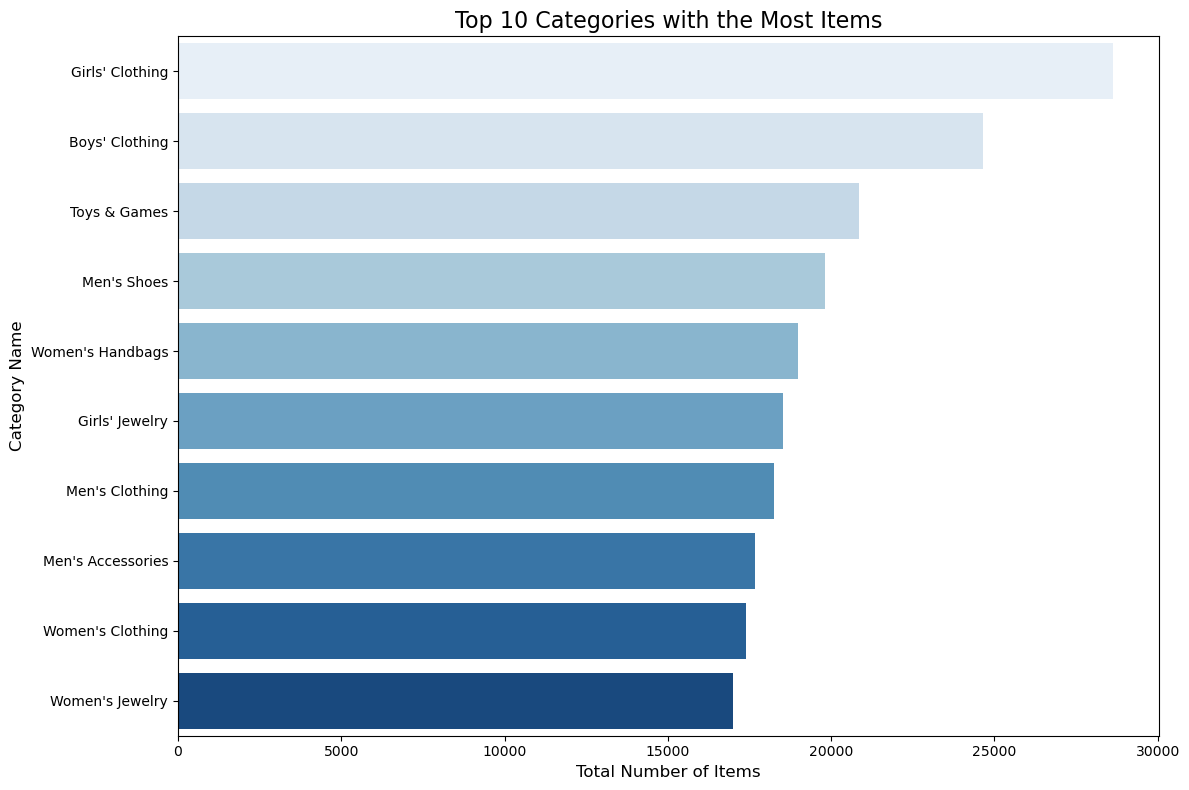

In [15]:
# Bar Chart of Total number of items in each category (top 10)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_items', y='category_name', data=top_10_categories.head(10),hue='category_name', palette='Blues', legend=False)

plt.title('Top 10 Categories with the Most Items', fontsize=16)
plt.xlabel('Total Number of Items', fontsize=12)
plt.ylabel('Category Name', fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
# Average price before discount of each category

average_price_before_discount = df.groupby('category_name')['listPrice'].mean().reset_index(name='avg_price_before_discount')
avg_price_before = average_price_before_discount[['category_name', 'avg_price_before_discount']]
sorted_avg_price_before = avg_price_before.sort_values(by='avg_price_before_discount', ascending=False)
print(sorted_avg_price_before.to_string(index=False))

                                   category_name  avg_price_before_discount
                  Smart Home - Heating & Cooling                 141.634588
                  Smart Home: Home Entertainment                 132.479602
                    Smart Home: Vacuums and Mops                  89.473718
                             Computers & Tablets                  88.428380
                                    Luggage Sets                  75.279195
                 Smart Home: WiFi and Networking                  75.000769
               Smart Home: Smart Locks and Entry                  67.610068
        Smart Home: Security Cameras and Systems                  58.745072
                               Computer Monitors                  58.300151
                     Smart Home: Other Solutions                  54.940571
                     Smart Home: Lawn and Garden                  51.673158
                                       Computers                  45.944628
            

In [17]:
# Average price after discount of each category

average_price_after_discount = df.groupby('category_name')['price'].mean().reset_index(name='avg_price_after_discount')
avg_price_after = average_price_after_discount[['category_name', 'avg_price_after_discount']]
sorted_avg_price_after = avg_price_after.sort_values(by='avg_price_after_discount', ascending=False)
print(sorted_avg_price_after.to_string(index=False))

                                   category_name  avg_price_after_discount
                                Computer Servers               1534.224685
                             Computers & Tablets                544.380915
                  Smart Home: Home Entertainment                347.994205
                                    Luggage Sets                229.588792
                    Smart Home: Vacuums and Mops                221.128077
                  Smart Home - Heating & Cooling                220.455233
                               Computer Monitors                219.811412
                    Computer External Components                163.548317
                                Video Projectors                161.998471
                                  Camera & Photo                160.576220
                                    Data Storage                154.196072
               Smart Home: Smart Locks and Entry                152.872203
  Smart Home Thermostats 

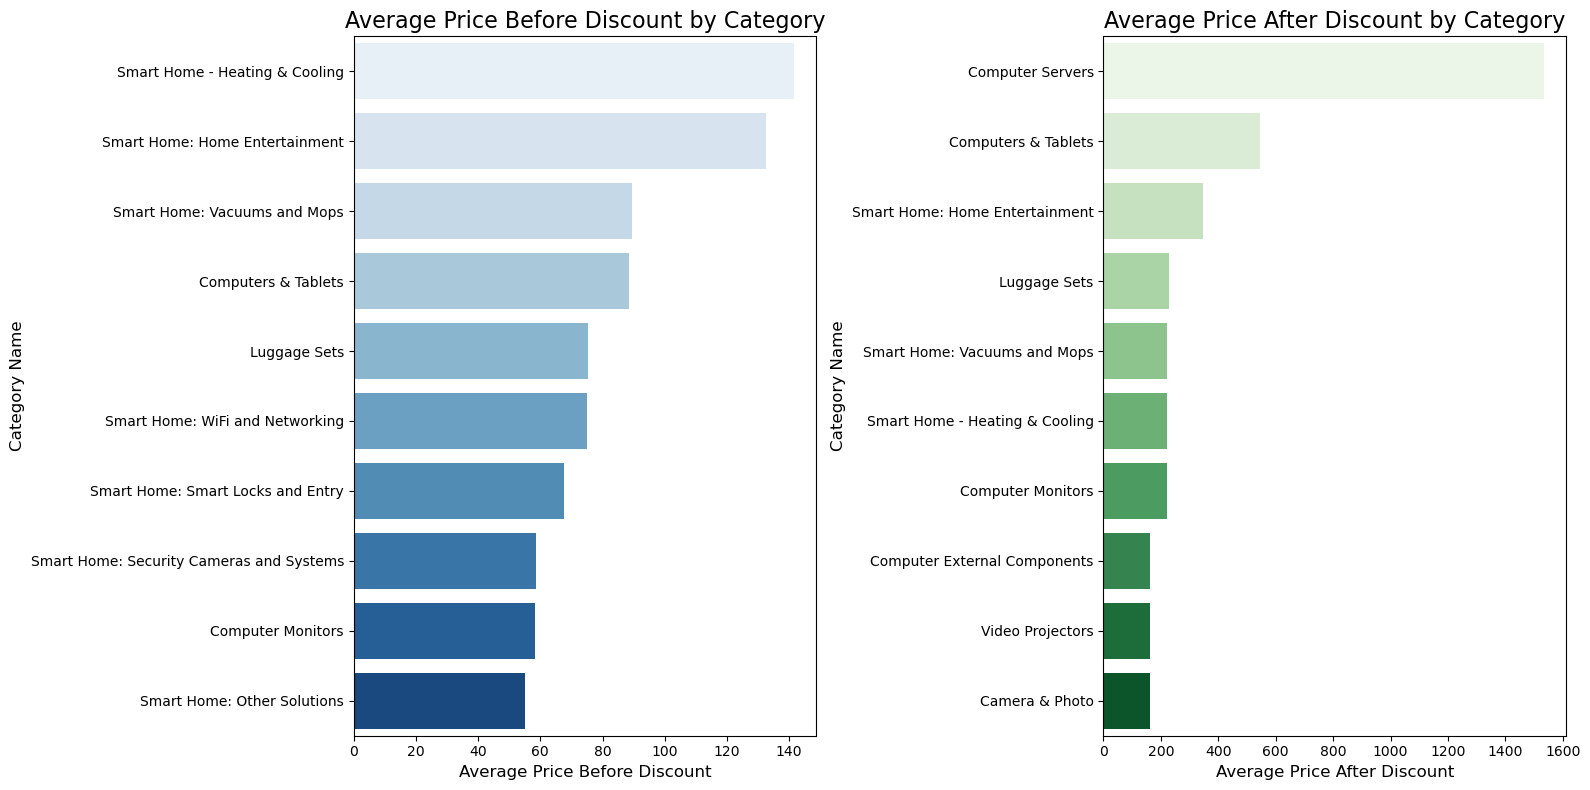

In [18]:
# Average Price Before and After Discount Visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart for average price before discount
sns.barplot(x='avg_price_before_discount', y='category_name', data=sorted_avg_price_before.head(10), hue='category_name', ax=axes[0], palette='Blues', legend=False)
axes[0].set_title('Average Price Before Discount by Category', fontsize=16)
axes[0].set_xlabel('Average Price Before Discount', fontsize=12)
axes[0].set_ylabel('Category Name', fontsize=12)

# Bar chart for average price after discount
sns.barplot(x='avg_price_after_discount', y='category_name', data=sorted_avg_price_after.head(10), hue='category_name', ax=axes[1], palette='Greens', legend=False)
axes[1].set_title('Average Price After Discount by Category', fontsize=16)
axes[1].set_xlabel('Average Price After Discount', fontsize=12)
axes[1].set_ylabel('Category Name', fontsize=12)


plt.tight_layout()
plt.show()

In [19]:
# Best seller products

best_seller_products = df[df['BestSeller']]
best_seller_product_ = best_seller_products[['title','rating','price']]
print(best_seller_product_)
best_seller_product_.shape[0]

                                                     title  rating  price
924         Men's Eversoft Cotton Stay Tucked Crew T-Shirt     4.6  18.48
925      Official Renaissance World Tour Merch Disco Co...     4.8  40.00
933            Men's Crew T-Shirts, Multipack, Style G1100     4.6  18.99
938      Men's Coolzone Boxer Briefs, Moisture Wicking ...     4.6  19.59
944      Men's Multi-Pack Mesh Ventilating Comfort Fit ...     4.6  14.99
...                                                    ...     ...    ...
1415016  Pyle 2Way Custom Component Speaker System-6.5”...     4.0  44.99
1415072  BOSS Audio Systems R1002 Riot Series Car Stere...     4.1  35.41
1416949  Pickleball Paddles, USAPA Approved Fiberglass ...     4.8  35.99
1416996                    Skechers Men's Afterburn M. Fit     4.4  40.00
1417015  FULLSOFT 3 Pack Leggings for Women Non See Thr...     4.3  20.39

[8520 rows x 3 columns]


8520

In [20]:
# Best seller product with five star rating

best_seller_five_star_products = df[(df['BestSeller'] == True) & (df['rating'] == 5)]
best_selling_best_rating_products = best_seller_five_star_products[['title', 'rating', 'price']]
print(best_selling_best_rating_products.head(5))
best_selling_best_rating_products.shape[0]

                                                    title  rating   price
50789   Upgraded 1600+ Miles Range TV Antenna-Digital ...     5.0  159.99
50943   680+ Miles Range TV Antenna,Digital TV Antenna...     5.0   56.99
50999   2023 Upgraded TV Antenna Smart Digital HD Indo...     5.0   39.99
51810   2023 Upgraded Digital TV Antenna, 680+ Miles R...     5.0   56.99
137924  Classic Edition Mini Retro Game Console,AV Out...     5.0   99.96


42

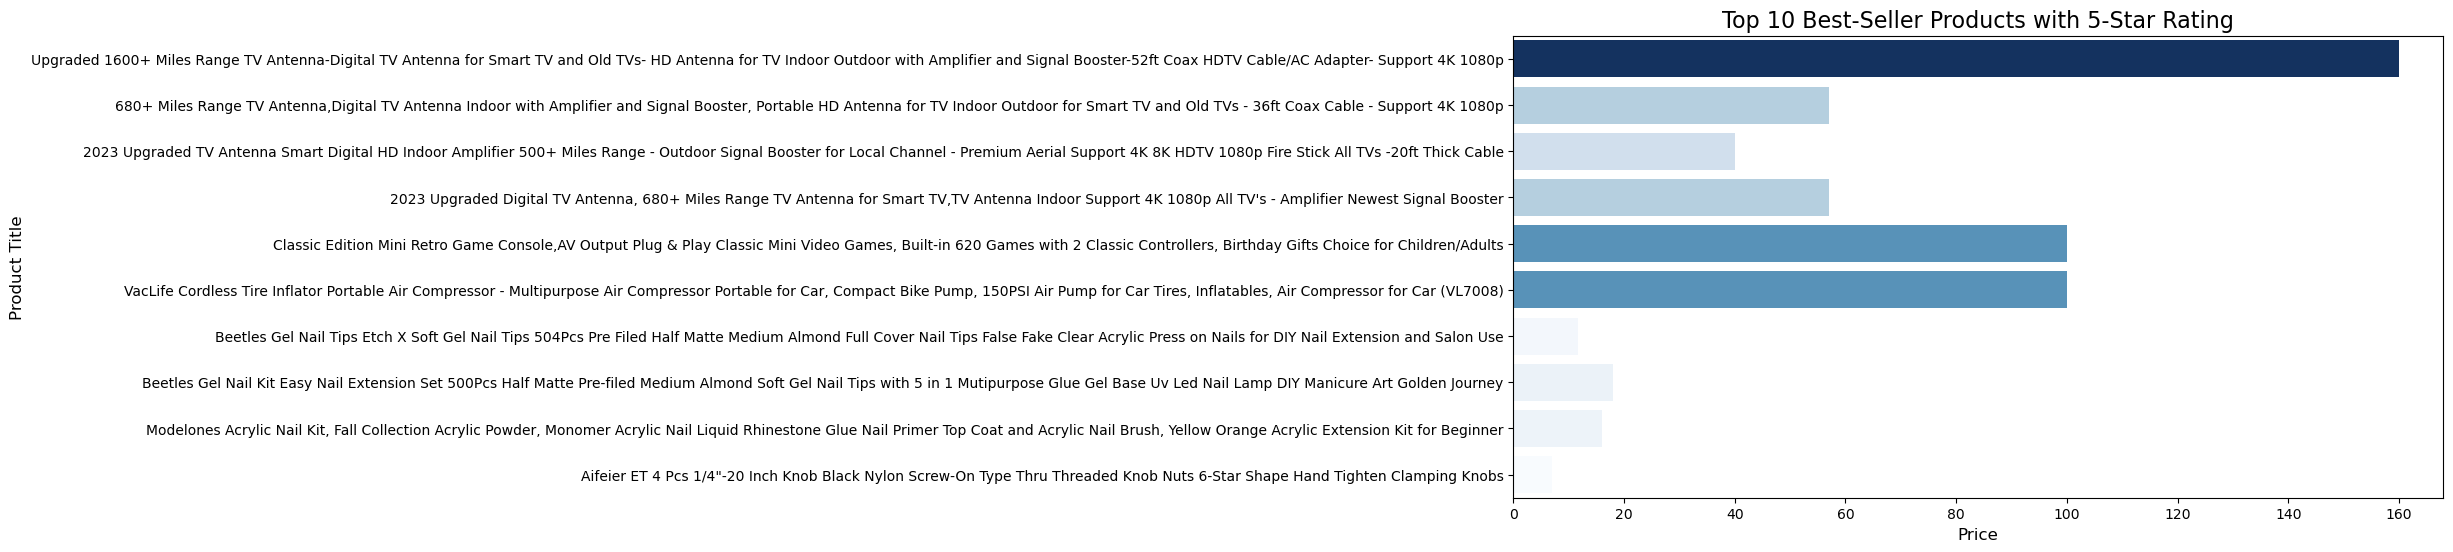

In [21]:
# Best seller product with five star rating Visualization

best_selling_best_rating_products = best_selling_best_rating_products.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='title', data=best_selling_best_rating_products,hue='price', palette='Blues', legend=False )

# Add titles and labels
plt.title('Top 10 Best-Seller Products with 5-Star Rating', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Product Title', fontsize=12)

plt.show()

In [22]:
# 5 star rating products

five_star_products = df[df['rating'] == 5]
five_star_rating = five_star_products[['title', 'rating', 'price']]
print(five_star_rating)

total_five_star_products = five_star_rating.shape[0]
print(f"Total number of 5-star rated products: {total_five_star_products}")

                                                     title  rating   price
109      24 Inch Suitcase with Separate Compartment, Wa...     5.0   99.99
168      MaXpace 31" Softside UltraLight Checked Spinne...     5.0   82.60
209      Luggage Suitcase with Spinner Wheels, Hardside...     5.0   79.00
218      Mountain Products Quadro Pro Hardcase, 22, Dee...     5.0  188.13
228                                      2023 Terminal Bag     5.0  221.05
...                                                    ...     ...     ...
1426270                       Gold Rush Cord Fitted blk/gl     5.0   44.99
1426284         sunglasses Garrett (FT0862-S 52E) - lenses     5.0  205.16
1426303  Roan Mountain Titanium Belt - Brown | USA-Made...     5.0  149.99
1426311                                 Men's Contemporary     5.0    0.00
1426321  Windward Original Series | Fishing Sunglasses ...     5.0   27.99

[94840 rows x 3 columns]
Total number of 5-star rated products: 94840


In [23]:
# Average rating of all product 

overall_average_rating = df['rating'].mean()
print(overall_average_rating)

3.9995118264477476


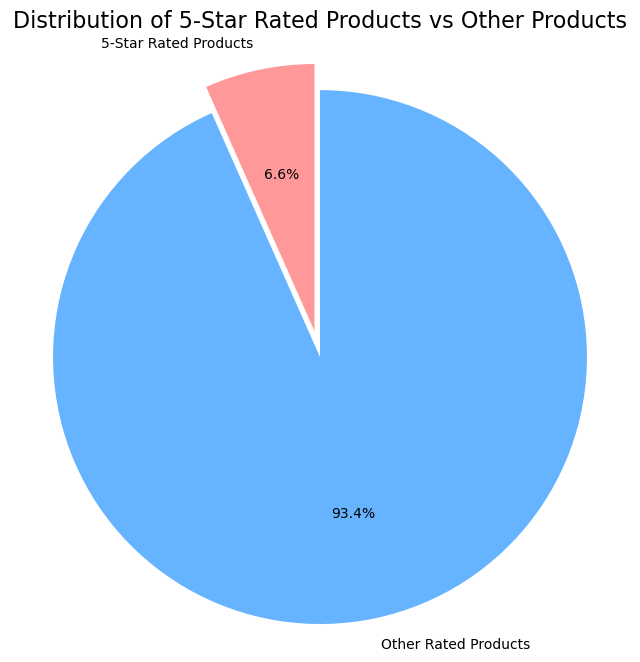

In [24]:
other_products = df[df['rating'] != 5].shape[0]

# Pie chart data
labels = ['5-Star Rated Products', 'Other Rated Products']
sizes = [total_five_star_products, other_products]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of 5-Star Rated Products vs Other Products', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.show()

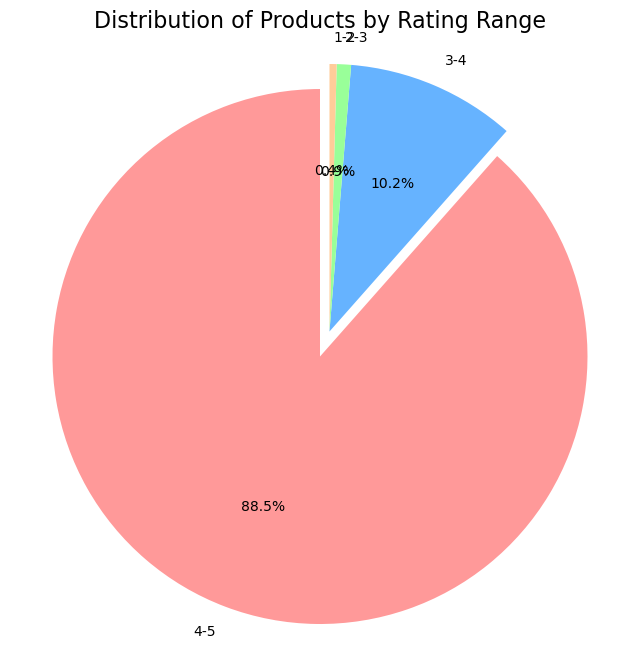

In [25]:
# Pie chart for rating range's

bins = [1, 2, 3, 4, 5]
labels = ['1-2', '2-3', '3-4', '4-5']

df['rating_range'] = pd.cut(df['rating'], bins=bins, labels=labels, right=False)
rating_range_counts = df['rating_range'].value_counts()

# Pie chart data
labels = rating_range_counts.index
sizes = rating_range_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of Products by Rating Range', fontsize=16)
plt.axis('equal')  

plt.show()

In [26]:
#average rating of products of each category

average_rating_by_category = df.groupby('category_name')['rating'].mean().reset_index(name='avg_rating_by_category')
sorted_avg_rating_by_category = average_rating_by_category.sort_values(by='avg_rating_by_category', ascending=False)
print(sorted_avg_rating_by_category.to_string(index=False))


                                   category_name  avg_rating_by_category
                                      Gift Cards                4.832374
                              Health & Household                4.567541
                         Industrial & Scientific                4.554726
                              Household Supplies                4.545314
                                Kitchen & Dining                4.544674
               Food Service Equipment & Supplies                4.522902
                            Electrical Equipment                4.518131
                        Power Tools & Hand Tools                4.502181
                               Sports & Outdoors                4.499774
                           Electronic Components                4.487720
                                 Home Appliances                4.483999
                    Automotive Replacement Parts                4.483158
                                Kids' Home Store   

In [27]:
#top best seller product with best rating

best_seller_five_star_products = df[(df['BestSeller'] == True) & (df['rating'] == 5)]
best_selling_best_rating_products = best_seller_five_star_products.sort_values(by='boughtInLastMonth', ascending=False)
best_selling_best_rating_products = best_selling_best_rating_products[['title', 'rating', 'price']]
print(best_selling_best_rating_products)

                                                     title  rating   price
1056116  Sakugi Shower Caddy - 3 Piece Set, Corner Show...     5.0   29.99
1157215           Lisle 35100 1/4" Pry Bar with Strike Cap     5.0    9.85
615530   Space Heater for Indoor Use, 1500W Electric Po...     5.0   59.99
630964   Pickleball Paddles, USAPA Approved Pickleball ...     5.0   29.99
691947   Paper Plates 9 inch - 150 Packs, 100% Composta...     5.0   24.99
633842   SEAFLO Easy Stack Pontoon Winter Storage Block...     5.0   64.99
972362   Hot Wheels '15 Dodge Challenger SRT, 55th Anni...     5.0    7.99
257328   Beetles Gel Nail Kit Easy Nail Extension Set 5...     5.0   17.99
1098907  HOTOR Travel Toiletry Bag for Women with Hangi...     5.0   19.99
633908   HiRui Volleyball Arm Guards Arm Sleeves, Passi...     5.0    6.99
818421   Genuine Denmark Oticon Branded, Wax Guards for...     5.0   22.60
166455   VacLife Cordless Tire Inflator Portable Air Co...     5.0   99.99
271743   Aifeier ET 4 Pcs

In [28]:
best_selling_best_rating_products.shape

(42, 3)

### Comparative Analysis

In [29]:
# Average Discount amount of product's of each category

df['discount_amount'] =  df['price'] - df['listPrice'] 
avg_discount_by_category = df.groupby('category_name')['discount_amount'].sum().reset_index(name='avg_discount_by_category')
sorted_total_discount_by_category = avg_discount_by_category.sort_values(by='avg_discount_by_category', ascending=False)
print(sorted_total_discount_by_category.to_string(index=False))


                                   category_name  avg_discount_by_category
                             Computers & Tablets                3813587.00
                                   Men's Watches                1085082.71
                                     Men's Shoes                1023295.34
                                    Data Storage                 837725.56
                                  Camera & Photo                 827638.62
                                Women's Handbags                 748110.33
                             Computer Networking                 704344.28
      Automotive Performance Parts & Accessories                 687187.60
                              Office Electronics                 687019.45
                                       Computers                 603530.53
                                   Women's Shoes                 597065.05
                               Computer Monitors                 578856.36
                     Home

In [30]:
#average rating of best seller and non-best seller 

bestseller_average_rating = df[df['BestSeller'] == True]['rating'].mean()
nonbestseller_average_rating = df[df['BestSeller'] == False]['rating'].mean()
print("bestseller avg rating ",bestseller_average_rating)
print("nonbestseller avg rating ",nonbestseller_average_rating)

bestseller avg rating  4.494037558685447
nonbestseller avg rating  3.9965401035535617


### Category-wise Insights

In [31]:
#total number of best seller item of each category

bestseller_items = df[df['BestSeller'] == True]
bestseller_count_by_category = bestseller_items.groupby('category_name').size().reset_index(name='total_bestseller_items')
bestseller_count_by_category = bestseller_count_by_category.sort_values(by='total_bestseller_items', ascending=False)
print(bestseller_count_by_category.to_string(index=False))


                                  category_name  total_bestseller_items
                               Sports & Fitness                     483
                        Industrial & Scientific                     404
                   Automotive Replacement Parts                     368
                               Kitchen & Dining                     279
                              Sports & Outdoors                     259
                       Tools & Home Improvement                     240
                                   Toys & Games                     240
                               Women's Clothing                     164
                             Outdoor Recreation                     150
                   Automotive Tools & Equipment                     149
                                Girls' Clothing                     140
                            Home Décor Products                     133
                         Accessories & Supplies                 

### Monthly Analysis

In [32]:
# Total items sold in last month.

total_item_sold_lastmonth = df['boughtInLastMonth'].count()
print('total_item_sold_lastmonth',total_item_sold_lastmonth)

total_item_sold_lastmonth 1426337


In [33]:
# total item sold in last month by category

total_item_sold_lastmonth_by_category = df.groupby('category_name')['boughtInLastMonth'].sum().reset_index(name='total_items_sold_last_month')
total_item_sold_lastmonth_by_category = total_item_sold_lastmonth_by_category.sort_values(by='total_items_sold_last_month', ascending=False)
print(total_item_sold_lastmonth_by_category.to_string(index=False))

                                   category_name  total_items_sold_last_month
                                Kitchen & Dining                     10432300
                              Hair Care Products                      8012850
                         Industrial & Scientific                      7093350
                     Household Cleaning Supplies                      6875700
                              Skin Care Products                      6612150
                              Health & Household                      6138000
                                    Toys & Games                      5858000
                     Home Storage & Organization                      5356200
                                    Dog Supplies                      4576650
                              Household Supplies                      4289000
                                          Makeup                      4158450
                             Home Décor Products                

### Top-N Items

In [34]:
#top 10 expensive items 

top_10_expensive_items = df.sort_values(by='price', ascending=False).head(10)
top_10_expensive_items = top_10_expensive_items[['title', 'price','productURL']]
print(top_10_expensive_items.to_string(index=False))

                                                                                              title    price                           productURL
                                                   Overland Storage Neoxl80 Storagelibrary Lto8 SAS 19731.81 https://www.amazon.com/dp/B077BCV1JT
                                                                                   replicas Marinas 19400.00 https://www.amazon.com/dp/B0CJHXQS8R
                         CISCO Systems 1 Port ATM Enhanced Oc12/Stm4 Single Mode Intermediate Reach 16468.70 https://www.amazon.com/dp/B0000516QJ
                                             Cisco Systems 7140 Router Dual 10/100 Fe Dual Ac IP Sw 12629.66 https://www.amazon.com/dp/B0000516Q1
                                              PARTNERS BRAND Corrugated Trash Can Plain - 40 Gallon 12519.96 https://www.amazon.com/dp/B08XMXFW1Q
             Sony VPL-XW6000ES 4K HDR Laser Home Theater Projector with Native 4K SXRD Panel, White 11998.00 https://www.ama

In [35]:
#top 10 cheapest items

df_filtered = df[df['price'] > 0]
top_10_cheapest_items = df_filtered.sort_values(by='price', ascending=False).tail(10)
top_10_cheapest_items = top_10_cheapest_items[['title', 'price','productURL']]
print(top_10_cheapest_items.to_string)

<bound method DataFrame.to_string of                                                      title  price  \
1104487  2x size 20mm black rubber silicone leather rep...   0.01   
342000   3Pack Animal Pull Back Cars, Piggy Rabbit Fric...   0.01   
640424   Expansion Joint Replacement (+ XL Sizes) - Fre...   0.01   
877781                      DMC Stranded Cotton Number 645   0.01   
709764   Stress Relief Toys,Squeeze Toy Relieve Stress ...   0.01   
371674                                   Zhu Zhu Pets - PC   0.01   
1016292  bA1 Health - 3-Sided Specialty Toothbrush (Com...   0.01   
709380   Squeezing Toy Stress Relief Portable Sensory S...   0.01   
878156                      DMC Stranded Cotton Number 775   0.01   
341730   Pull Back Toy Kids Pull Back Car Simulation Ve...   0.01   

                                   productURL  
1104487  https://www.amazon.com/dp/B07919F2BP  
342000   https://www.amazon.com/dp/B0BMQG2F77  
640424   https://www.amazon.com/dp/B00EA03NJQ  
877781   ht

### Outlier Detection

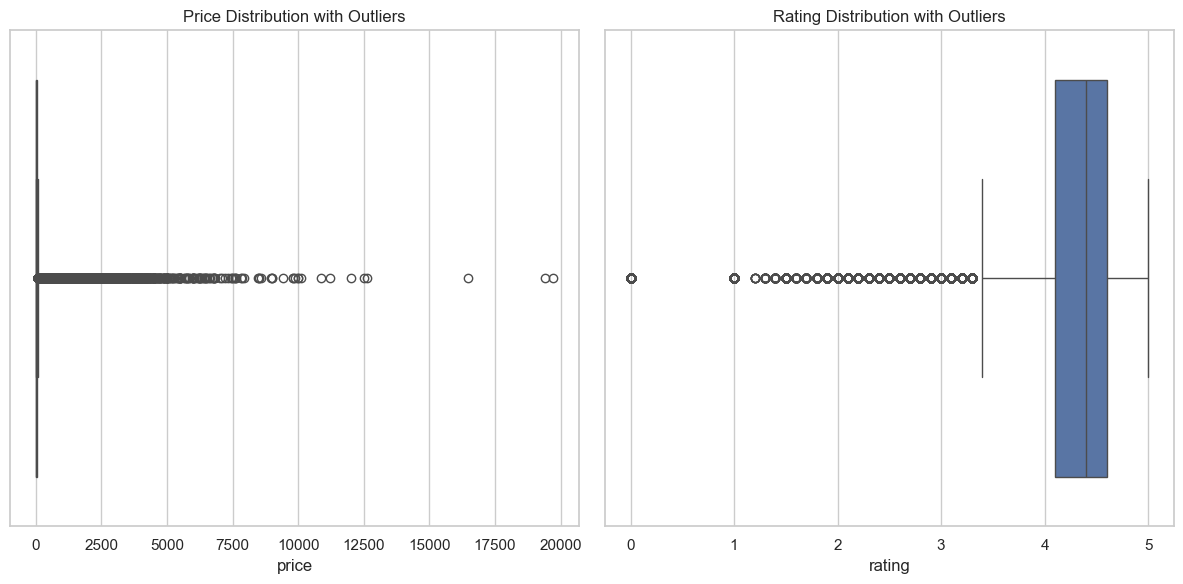

In [36]:
# Boxplots for Outliers Detection

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Boxplot for Price
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='price')
plt.title('Price Distribution with Outliers')

# Boxplot for Rating
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='rating')
plt.title('Rating Distribution with Outliers')

plt.tight_layout()
plt.show()

In [37]:
# High Price but Low Rating Analysis

high_price_threshold = df['price'].quantile(0.75) 
low_rating_threshold = df['rating'].quantile(0.25) 
high_price_low_rating_items = df[(df['price'] > high_price_threshold) & (df['rating'] < low_rating_threshold)]
print("High Price but Low Rating Items:")
print(high_price_low_rating_items[['title', 'price', 'rating']])

High Price but Low Rating Items:
                                                     title    price  rating
18       Boren Polycarbonate Hardside Rugged Travel Sui...    99.99     3.9
31       Alpha 3 Extended Trip Expandable 4-Wheeled Pac...  1395.00     3.9
41       Helium DLX Softside Luggage Under-Seater with ...   108.00     3.9
65       Carry On Luggage Suitcase with Spinner Wheels ...   155.99     4.0
90       Alpha 3 Worldwide Trip Expandable 4-Wheeled Pa...  1495.00     3.7
...                                                    ...      ...     ...
1426295      Men's Ea3210u Universal Fit Square Sunglasses    83.08     0.0
1426307                                      Wesley Fedora    69.00     3.8
1426308                      Men's Delio Square Sunglasses   284.40     3.6
1426314                           Rb4286 Square Sunglasses    67.06     3.6
1426319  Rx5398f Hawkeye Low Bridge Fit Square Prescrip...   188.00     0.0

[92802 rows x 3 columns]


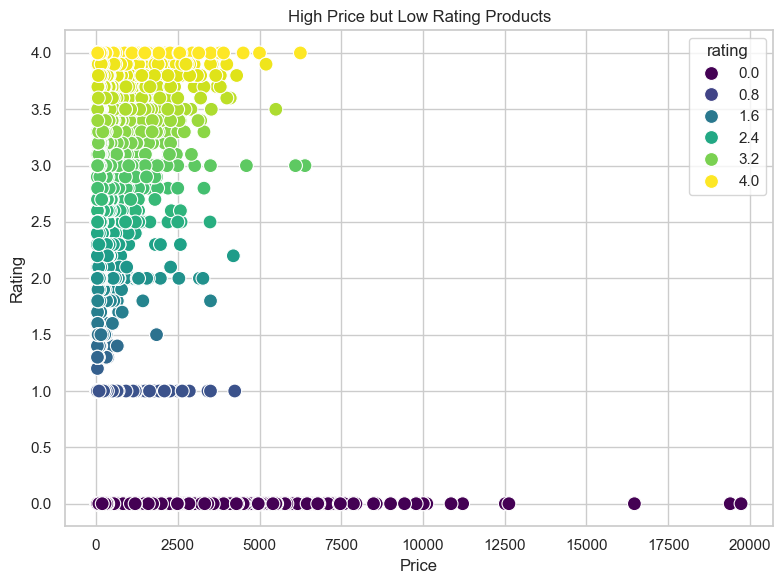

In [38]:
# Scatter Plot for High Price and Low Rating Analysis

plt.figure(figsize=(8, 6))
sns.scatterplot(data=high_price_low_rating_items, x='price', y='rating', hue='rating', palette='viridis', s=100)
plt.title('High Price but Low Rating Products')
plt.xlabel('Price')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

### Co-relation

Correlation Matrix:
          rating     price
rating  1.000000 -0.079325
price  -0.079325  1.000000


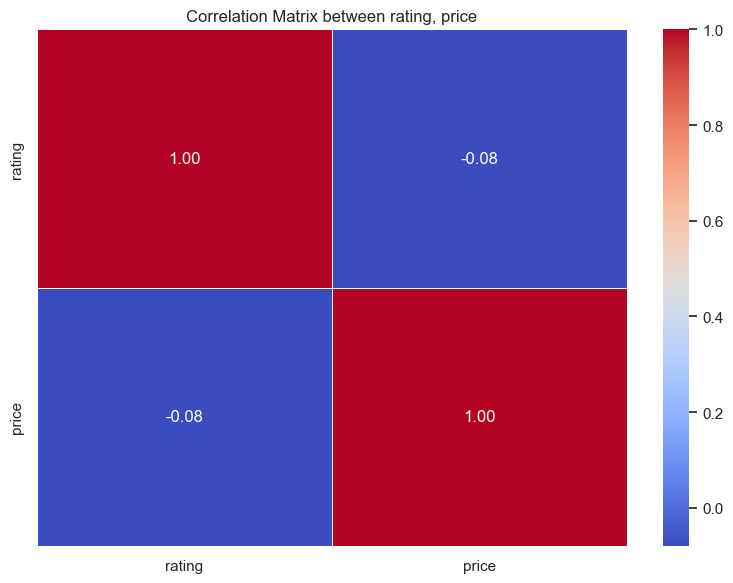

In [39]:
# correlation between rating and price.

correlation_matrix = df[['rating', 'price']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

#Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between rating, price')
plt.tight_layout()
plt.show()

Correlation Matrix:
           listPrice     price
listPrice   1.000000  0.200116
price       0.200116  1.000000


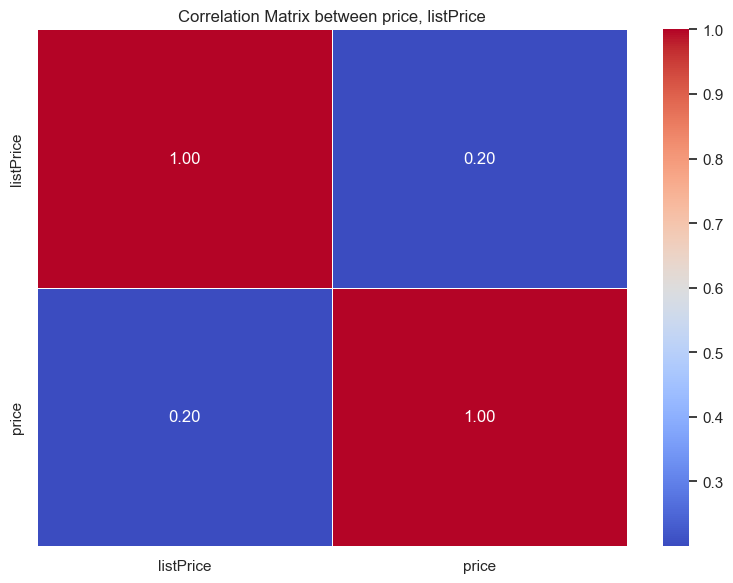

In [40]:
# correlation between listPrice and price.

correlation_matrix = df[['listPrice', 'price']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

#Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between price, listPrice')
plt.tight_layout()
plt.show()

Correlation Matrix:
                   boughtInLastMonth     price
boughtInLastMonth           1.000000 -0.026597
price                      -0.026597  1.000000


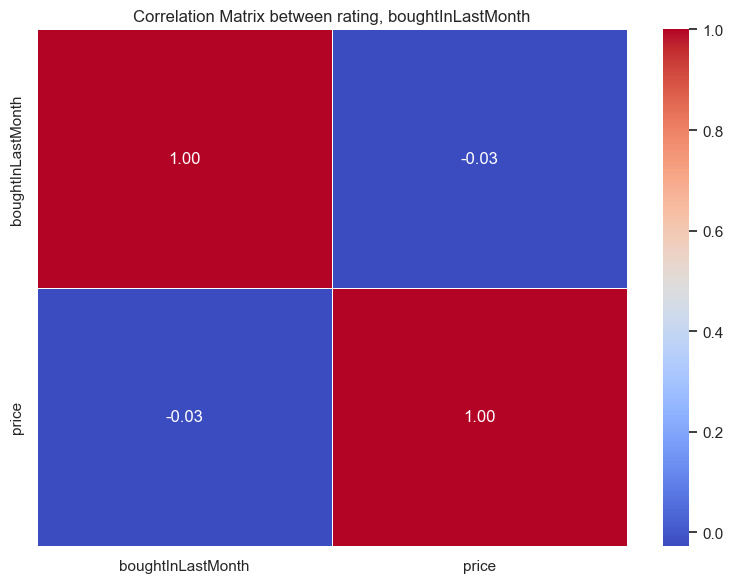

In [41]:
# correlation between rating and boughtlastmonth.

correlation_matrix = df[['boughtInLastMonth', 'price']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

#Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between rating, boughtInLastMonth')
plt.tight_layout()
plt.show()

### Visualization using multiple tools

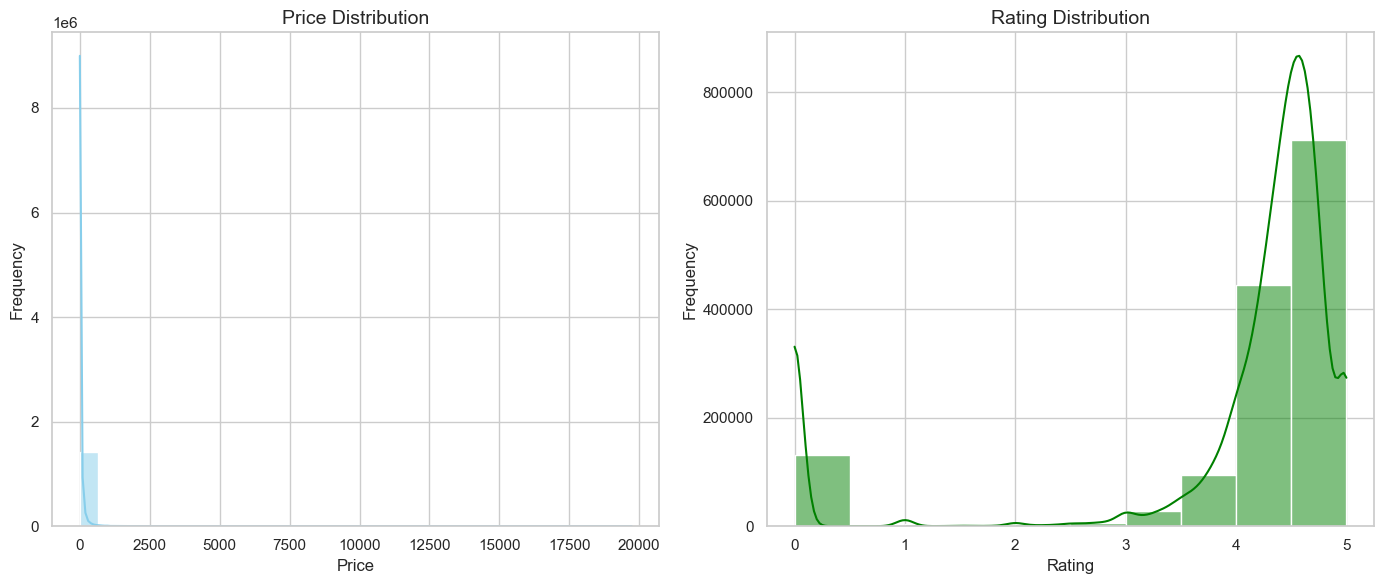

In [42]:
# Histograms of Price and Rating Distribution

plt.figure(figsize=(14, 6))

# histogram for Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# histogram for Rating Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['rating'], kde=True, color='green', bins=10)
plt.title('Rating Distribution', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

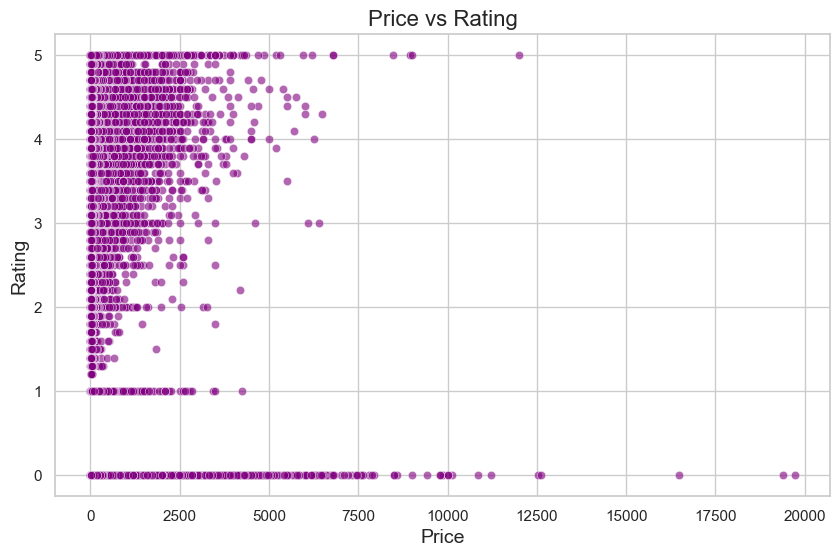

In [43]:
# Scatter plot for Price vs Rating

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='price', y='rating', color='purple', alpha=0.6)
plt.title('Price vs Rating', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Rating', fontsize=14)

plt.show()

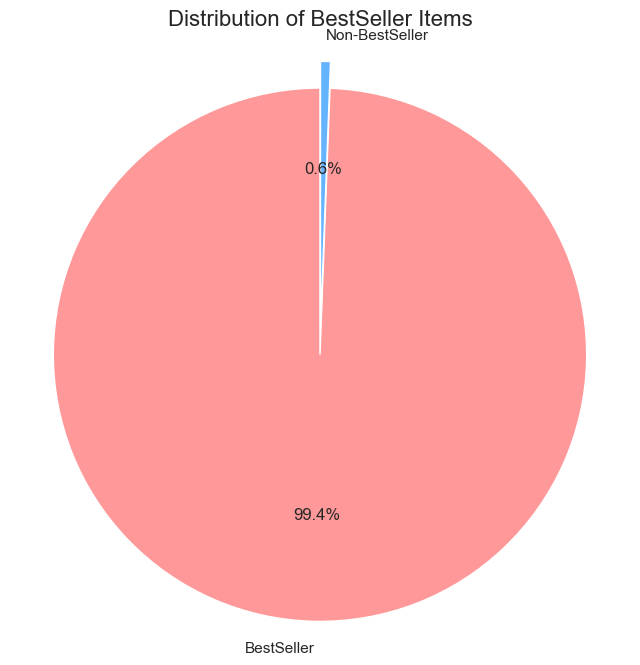

In [44]:
# Pie Chart Distribution of BestSeller Items

bestseller_counts = df['BestSeller'].value_counts()

labels = ['BestSeller', 'Non-BestSeller']
sizes = bestseller_counts.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of BestSeller Items', fontsize=16)
plt.axis('equal')  

plt.show()

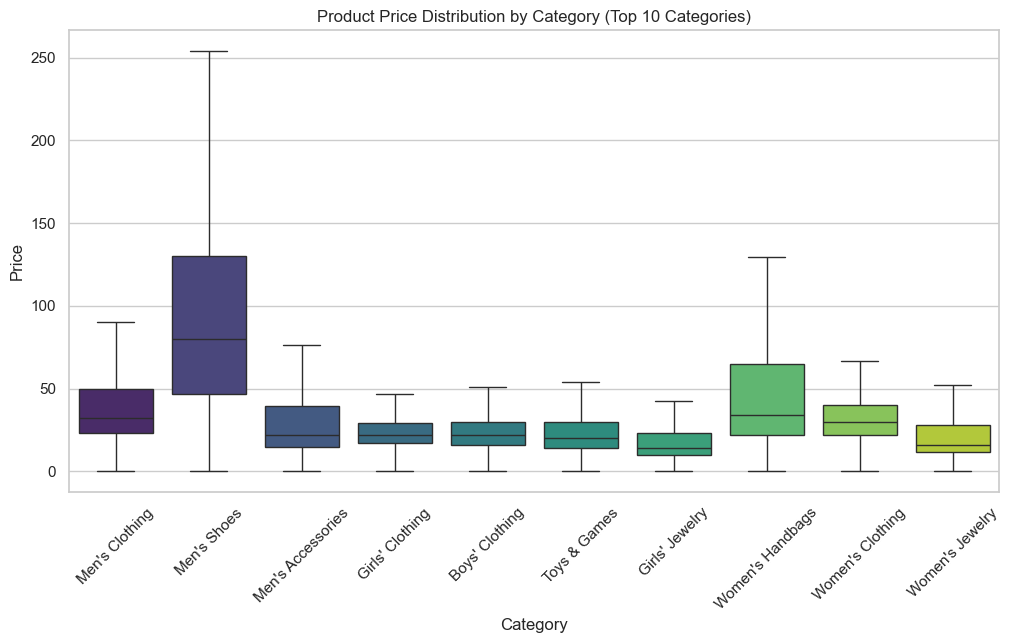

In [45]:
# Product Price Distribution by Category (top 10)

category_counts = df.groupby('category_name').size().reset_index(name='total_items')
top_10_categories = category_counts.sort_values(by='total_items', ascending=False).head(10)
top_10_category_data = df[df['category_name'].isin(top_10_categories['category_name'])]


plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='price', data=top_10_category_data, hue='category_name', palette='viridis', showfliers=False)
plt.title('Product Price Distribution by Category (Top 10 Categories)')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

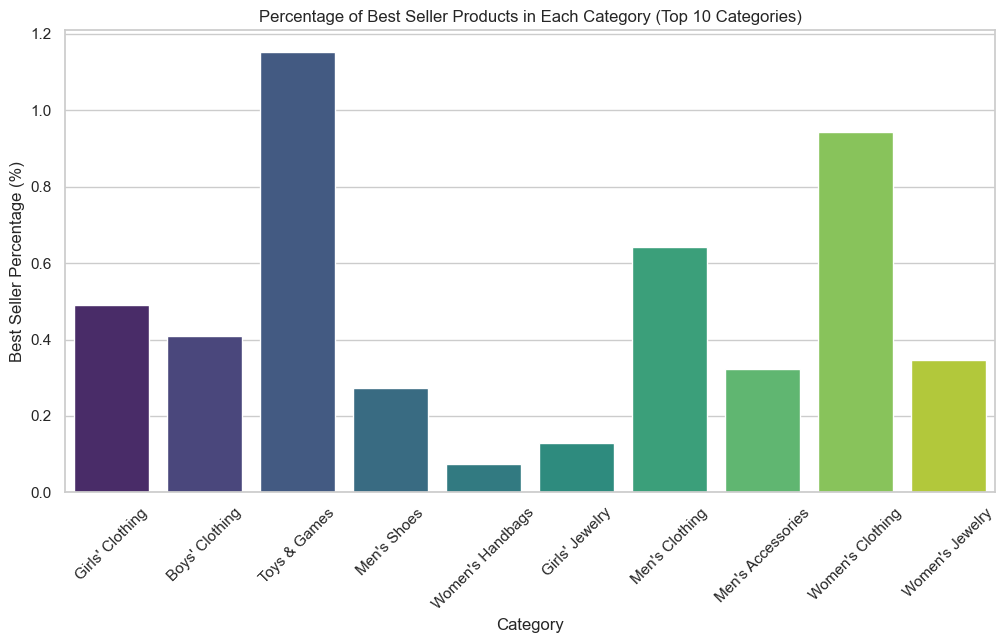

In [47]:
# Percentage of Best Seller Products in Each Category (top 10)

category_counts = df.groupby('category_name').size().reset_index(name='total_items')
bestseller_counts = df[df['BestSeller'] == True].groupby('category_name').size().reset_index(name='bestseller_items')
category_data = pd.merge(category_counts, bestseller_counts, on='category_name', how='left')
category_data['bestseller_percentage'] = (category_data['bestseller_items'] / category_data['total_items']) * 100
top_10_categories = category_data.sort_values(by='total_items', ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x='category_name', y='bestseller_percentage', data=top_10_categories, hue='category_name', palette='viridis', legend=False)
plt.title('Percentage of Best Seller Products in Each Category (Top 10 Categories)')
plt.xlabel('Category')
plt.ylabel('Best Seller Percentage (%)')
plt.xticks(rotation=45)
plt.show()